In [1]:
import sys
sys.path.append('..')

from optionpricer import payoff
from optionpricer import option
from optionpricer import bspde
from optionpricer import analytics

import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

# set up the properties of the underlying, and option
strike = 50.0      # the strike price of the option
expiry = 10.0/12.0 # time until expiry (annualized)
r      = 0.024     # interest rate (as decimal, not percentage) 
sig    = 0.12      # volatility (annualized)

# create a payoff object, for a call payoff with the strike as set above
call_payoff = payoff.CallPayOff(strike)
# create the option object, using the payoff we just created, and our expiry
call_option = option.VanillaOption(call_payoff,expiry)

# printing the option tells us something useful about the object
print(call_option)

a vanilla option with a call pay off with strike:50.0, and expiry: 210.0days


In [3]:
# To price the option via PDE methods, we first create a Boundary Condition
# object, here in 1D because we are pricing an option on 1 underlying

bcs = bspde.BoundaryConditions1D()
# we should really here apply specific boundary conditions, such as Dirichlet or Neumann
# conditions at the edges of the grid. Here though, in this simple case they can be neglected
# at the cost of some accuracy.

# create the pricing object, using our option (call_option), interest rate (r) 
# ,volatility (sig), and boundary conditions (bcs) we defined earlier. 
bspricer = bspde.BlackScholesSingleAssetPricer(call_option,r,sig,bcs)
# N.b. we haven;t yet run the solver, just created an object that will perform this

In [4]:
# define the spots at which we want to calculate the price of the option
spots=np.linspace(30.0,60.0,20)

# use our Black Scholes pde pricer (bspricer) to get the price of the option at 'spots'
prices    = bspricer.solve(spots)
# for comparison get the analytic (exact, within BS assumtions) price of the option
bs_prices = analytics.black_scholes_call_price(spots,strike,expiry,r,sig)

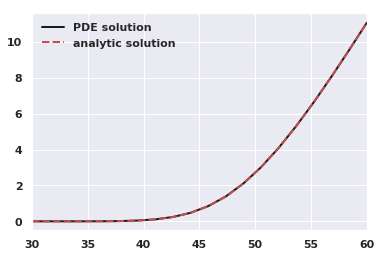

In [5]:
sns.set()
mpl.rcParams['lines.linewidth']  = 2.0
mpl.rcParams['font.weight']      = 'bold'
mpl.rcParams['axes.labelweight'] = 'bold'
mpl.rcParams['font.size']        = 12
mpl.rcParams['legend.frameon']   = False

plt.plot(spots, prices, 'k',label='PDE solution')
plt.plot(spots, bs_prices, 'r--',label='analytic solution')

plt.legend()

plt.xlim([spots[0],spots[-1]])
plt.ylim([-0.5, 1.05*max(np.amax(prices),np.amax(bs_prices))])
plt.show()